# Redução de dimensionalidade  --- Principal Component Analysis(PCA)

Muitas vezes os dados possuem atributos demais os quais dificulta a visualizção. Além disso, o excesso deles pode gerar um peso alto em fatores de pouca importância. Para contornar esses problemas existem os algoritmos de redução de dimensionalidade.

O PCA é um algoritmo de aprendizado não supervisionado, ele foi desenvolvido por métodos matemáticos a fim de reduzir a dimensionalidade de um problema. 

<img src = 'imagens/nagesh-pca-5.gif'>

Em um espaço com N dimensões, pode-se aplica-lo para reduzir em quantas dimensões forem suficientes.



## Processo de redução

A Redução utiliza de métodos de álgebra linear para ser executada. Primeiramente calcula-se a matriz de correlação das variáveis, em seguida, os autovetores e os autovalores das mesmas. Com os autovalores em ordem, sabe-se quais variáveis possuem a maior relevância para a informação. Então escolhe-se o número de autovetores a serem multiplicados pela matriz original, tendo por fim uma matriz de n variáveis por m dimensões (número de autovetores).

## Problema

Aplicar o PCA do scratch para a base de dados dos tipos de cancer de mama

In [1]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.keys()
 
# Check the output classes
print(data['target_names'])
 
# Check the input attributes
print(data['feature_names'])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [29]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Para o PCA funcionar deve-se deixar os dados regularizados

scaling=StandardScaler()
scaling.fit(df1)

Scaled_data=scaling.transform(df1)

In [11]:
Scaled_data.shape

(569, 30)

In [12]:
# Calculo da matriz de covariancia

scaled_mean = Scaled_data - np.mean(Scaled_data, axis=0)

cov_mat = np.cov(scaled_mean, rowvar = False)

cov_mat

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [13]:
# Calculo dos AutoVetores e AutoValores
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

# Ordena-los
sorted_index = np.argsort(eigen_values)[::-1]
 
sorted_eigenvalue = eigen_values[sorted_index]

sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [15]:
sorted_eigenvalue

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

13 e 5 as variáveis de maior variância

In [14]:
# Aplicar a quantidade de autvetores

n_components = 2 
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [18]:
# Multiplicar a matriz pelos autovetores de maior variancia

X_reduced = np.dot(eigenvector_subset.transpose(),scaled_mean.transpose()).transpose()

In [25]:
X_reduced[0]

array([-9.19283683, -1.94858307])

In [27]:
X_reduced.T

array([[ -9.19283683,  -2.3878018 ,  -5.73389628, ...,  -1.25617928,
        -10.37479406,   5.4752433 ],
       [ -1.94858307,   3.76817174,   1.0751738 , ...,   1.90229671,
         -1.67201011,   0.67063679]])

In [37]:
matriz = pd.DataFrame(X_reduced)

In [39]:
matriz['Target'] = data['target']

In [45]:
matriz = matriz.rename(columns={0: 'Variavel1', 1: 'Variavel2'})

<AxesSubplot:xlabel='Variavel1', ylabel='Variavel2'>

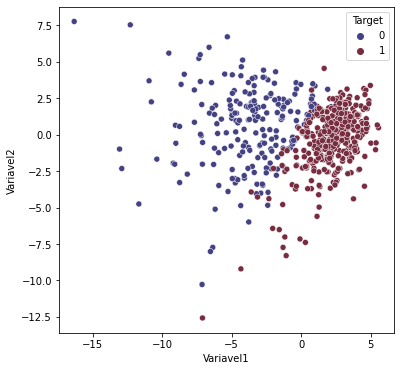

In [54]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize = (6,6))
sb.scatterplot(data = matriz , x = 'Variavel1' ,y ='Variavel2' , hue = 'Target', palette= 'icefire')

Agora conseguimos visualizar uma base de 30 variáveis em um plano bidimensional.

### Usando o algoritmo pronto do Sklearn

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
x.shape

(569, 2)

In [59]:
df3 = pd.DataFrame(x)
df3 = df3.rename(columns={0: 'Variavel1', 1: 'Variavel2'})
df3['Target'] = data['target']

<AxesSubplot:xlabel='Variavel1', ylabel='Variavel2'>

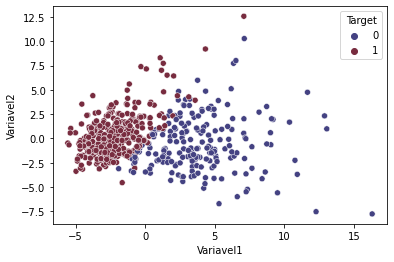

In [62]:
sb.scatterplot(data = df3 , x = 'Variavel1' ,y ='Variavel2' , hue = 'Target', palette= 'icefire')

Obtivemos o mesmo resultado

## Referencias

https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/?ref=gcse

https://www.kdnuggets.com/2020/05/dimensionality-reduction-principal-component-analysis.html

https://towardsdatascience.com/understanding-pca-autoencoders-algorithms-everyone-can-understand-28ee89b570e2

http://www.ic.uff.br/~aconci/PCA-ACP.pdf

https://www.askpython.com/python/examples/principal-component-analysis
